In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
import pandas as pd
df=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/stroke_prediction_dataset.csv')

In [5]:
df.shape

(15000, 22)

In [6]:
df.columns

Index(['Patient ID', 'Patient Name', 'Age', 'Gender', 'Hypertension',
       'Heart Disease', 'Marital Status', 'Work Type', 'Residence Type',
       'Average Glucose Level', 'Body Mass Index (BMI)', 'Smoking Status',
       'Alcohol Intake', 'Physical Activity', 'Stroke History',
       'Family History of Stroke', 'Dietary Habits', 'Stress Levels',
       'Blood Pressure Levels', 'Cholesterol Levels', 'Symptoms', 'Diagnosis'],
      dtype='object')

In [7]:
df.head()

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


In [8]:
df = df.drop(['Patient ID', 'Patient Name'], axis=1)

In [9]:
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure Levels'].str.split('/', expand=True)
df['Systolic BP'] = pd.to_numeric(df['Systolic BP'])
df['Diastolic BP'] = pd.to_numeric(df['Diastolic BP'])

In [10]:
df[['HDL','LDL']]=df['Cholesterol Levels'].str.extract(r'HDL: (\d+), LDL: (\d+)').astype(int)

In [11]:
df=df.drop(['Blood Pressure Levels','Cholesterol Levels'],axis=1)

In [12]:
df.columns

Index(['Age', 'Gender', 'Hypertension', 'Heart Disease', 'Marital Status',
       'Work Type', 'Residence Type', 'Average Glucose Level',
       'Body Mass Index (BMI)', 'Smoking Status', 'Alcohol Intake',
       'Physical Activity', 'Stroke History', 'Family History of Stroke',
       'Dietary Habits', 'Stress Levels', 'Symptoms', 'Diagnosis',
       'Systolic BP', 'Diastolic BP', 'HDL', 'LDL'],
      dtype='object')

In [13]:
df.shape

(15000, 22)

In [14]:
df.head()

,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,...,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Symptoms,Diagnosis,Systolic BP,Diastolic BP,HDL,LDL
0,56,Male,0,1,Married,Self-employed,Rural,130.91,22.37,Non-smoker,...,0,Yes,Vegan,3.48,"Difficulty Speaking, Headache",Stroke,140,108,68,133
1,80,Male,0,0,Single,Self-employed,Urban,183.73,32.57,Non-smoker,...,0,No,Paleo,1.73,"Loss of Balance, Headache, Dizziness, Confusion",Stroke,146,91,63,70
2,26,Male,1,1,Married,Never Worked,Rural,189.00,20.32,Formerly Smoked,...,0,Yes,Paleo,7.31,"Seizures, Dizziness",Stroke,154,97,59,95
3,73,Male,0,0,Married,Never Worked,Urban,185.29,27.50,Non-smoker,...,0,No,Paleo,5.35,"Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke,174,81,70,137
4,51,Male,1,1,Divorced,Self-employed,Urban,177.34,29.06,Currently Smokes,...,0,Yes,Pescatarian,6.84,Difficulty Speaking,Stroke,121,95,65,68


# **Handling Missing Values**

In [15]:
df.isnull().sum()

Age                            0
Gender                         0
Hypertension                   0
Heart Disease                  0
Marital Status                 0
Work Type                      0
Residence Type                 0
Average Glucose Level          0
Body Mass Index (BMI)          0
Smoking Status                 0
Alcohol Intake                 0
Physical Activity              0
Stroke History                 0
Family History of Stroke       0
Dietary Habits                 0
Stress Levels                  0
Symptoms                    2500
Diagnosis                      0
Systolic BP                    0
Diastolic BP                   0
HDL                            0
LDL                            0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       15000 non-null  int64  
 1   Gender                    15000 non-null  object 
 2   Hypertension              15000 non-null  int64  
 3   Heart Disease             15000 non-null  int64  
 4   Marital Status            15000 non-null  object 
 5   Work Type                 15000 non-null  object 
 6   Residence Type            15000 non-null  object 
 7   Average Glucose Level     15000 non-null  float64
 8   Body Mass Index (BMI)     15000 non-null  float64
 9   Smoking Status            15000 non-null  object 
 10  Alcohol Intake            15000 non-null  object 
 11  Physical Activity         15000 non-null  object 
 12  Stroke History            15000 non-null  int64  
 13  Family History of Stroke  15000 non-null  object 
 14  Dietar

In [17]:
# Handle missing values by filling with mode
most_frequent_symptom = df['Symptoms'].mode()[0]
most_frequent_symptom

'Difficulty Speaking'

In [18]:
df['Symptoms'].fillna(most_frequent_symptom, inplace=True)

In [19]:
df.isnull().sum()

Age                         0
Gender                      0
Hypertension                0
Heart Disease               0
Marital Status              0
Work Type                   0
Residence Type              0
Average Glucose Level       0
Body Mass Index (BMI)       0
Smoking Status              0
Alcohol Intake              0
Physical Activity           0
Stroke History              0
Family History of Stroke    0
Dietary Habits              0
Stress Levels               0
Symptoms                    0
Diagnosis                   0
Systolic BP                 0
Diastolic BP                0
HDL                         0
LDL                         0
dtype: int64

In [20]:
df.shape

(15000, 22)

#**Finding Duplicates**

In [21]:
duplicates = df[df.duplicated()]

if not duplicates.empty:
    duplicate_columns = df.columns[df.duplicated(keep=False).any()]
    print("Columns with Duplicates:")
    print(duplicate_columns)
else:
    print("No duplicates found.")

No duplicates found.


In [22]:
df.describe()

,Age,Hypertension,Heart Disease,Average Glucose Level,Body Mass Index (BMI),Stroke History,Stress Levels,Systolic BP,Diastolic BP,HDL,LDL
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,54.035667,0.249000,0.502933,129.445209,27.474302,0.500267,5.022694,135.048467,84.897667,55.064933,125.054267
std,21.063111,0.432448,0.500008,40.487792,7.230201,0.500017,2.873223,26.367423,14.683872,14.845410,37.593233
min,18.000000,0.000000,0.000000,60.000000,15.010000,0.000000,0.000000,90.000000,60.000000,30.000000,60.000000
25%,36.000000,0.000000,0.000000,94.517500,21.160000,0.000000,2.540000,112.000000,72.000000,42.000000,92.000000
50%,54.000000,0.000000,1.000000,128.900000,27.420000,1.000000,5.050000,135.000000,85.000000,55.000000,125.000000
75%,72.000000,0.000000,1.000000,164.592500,33.720000,1.000000,7.520000,158.000000,98.000000,68.000000,158.000000
max,90.000000,1.000000,1.000000,200.000000,40.000000,1.000000,10.000000,180.000000,110.000000,80.000000,190.000000


#**Handling Outliers**

In [23]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:", numerical_cols)

Numerical columns: Index(['Age', 'Hypertension', 'Heart Disease', 'Average Glucose Level',
       'Body Mass Index (BMI)', 'Stroke History', 'Stress Levels',
       'Systolic BP', 'Diastolic BP', 'HDL', 'LDL'],
      dtype='object')


In [24]:
def detect_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    upper = np.where(df[column] > upper_bound)
    lower = np.where(df[column] < lower_bound)
    print(f'Outliers in {column}:')
    print(f'Lower bound: {lower_bound}, Upper bound: {upper_bound}')
    print(f'Upper outliers: {upper}')
    print(f'Lower outliers: {lower}')
cols = ['Age', 'Average Glucose Level', 'Body Mass Index (BMI)','Stress Levels']

# Detect outliers for each numerical column
for col in cols:
    detect_outliers(df, col)

Outliers in Age:
Lower bound: -18.0, Upper bound: 126.0
Upper outliers: (array([], dtype=int64),)
Lower outliers: (array([], dtype=int64),)
Outliers in Average Glucose Level:
Lower bound: -10.595000000000013, Upper bound: 269.70500000000004
Upper outliers: (array([], dtype=int64),)
Lower outliers: (array([], dtype=int64),)
Outliers in Body Mass Index (BMI):
Lower bound: 2.320000000000004, Upper bound: 52.559999999999995
Upper outliers: (array([], dtype=int64),)
Lower outliers: (array([], dtype=int64),)
Outliers in Stress Levels:
Lower bound: -4.929999999999999, Upper bound: 14.989999999999998
Upper outliers: (array([], dtype=int64),)
Lower outliers: (array([], dtype=int64),)


#**Exploratory Data Analysis**

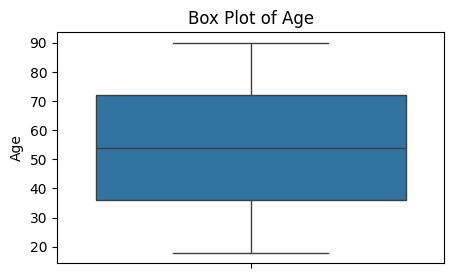

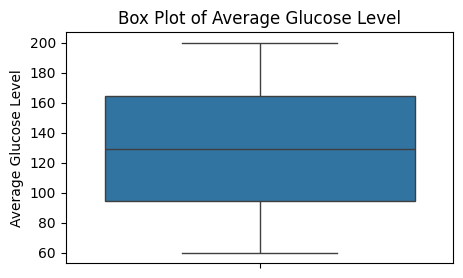

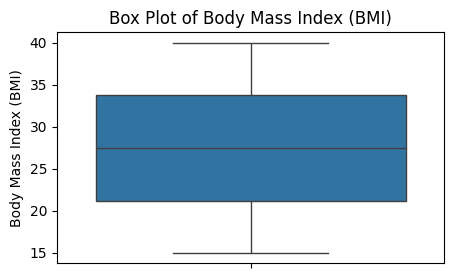

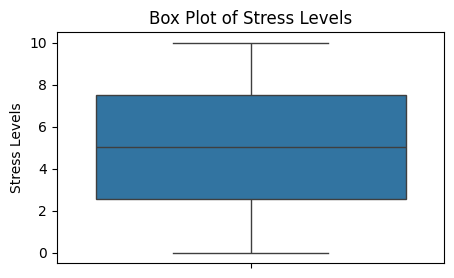

In [25]:
def create_box_plots(df, numerical_cols):
    for col in numerical_cols:
        plt.figure(figsize=(5, 3))
        sns.boxplot(data=df[col])
        plt.title(f'Box Plot of {col}')
        plt.show()

# Creating box plots for each numerical column
create_box_plots(df, cols)

######Observation: From the above box plots, we can observe that there are no outliers present in our dataset.

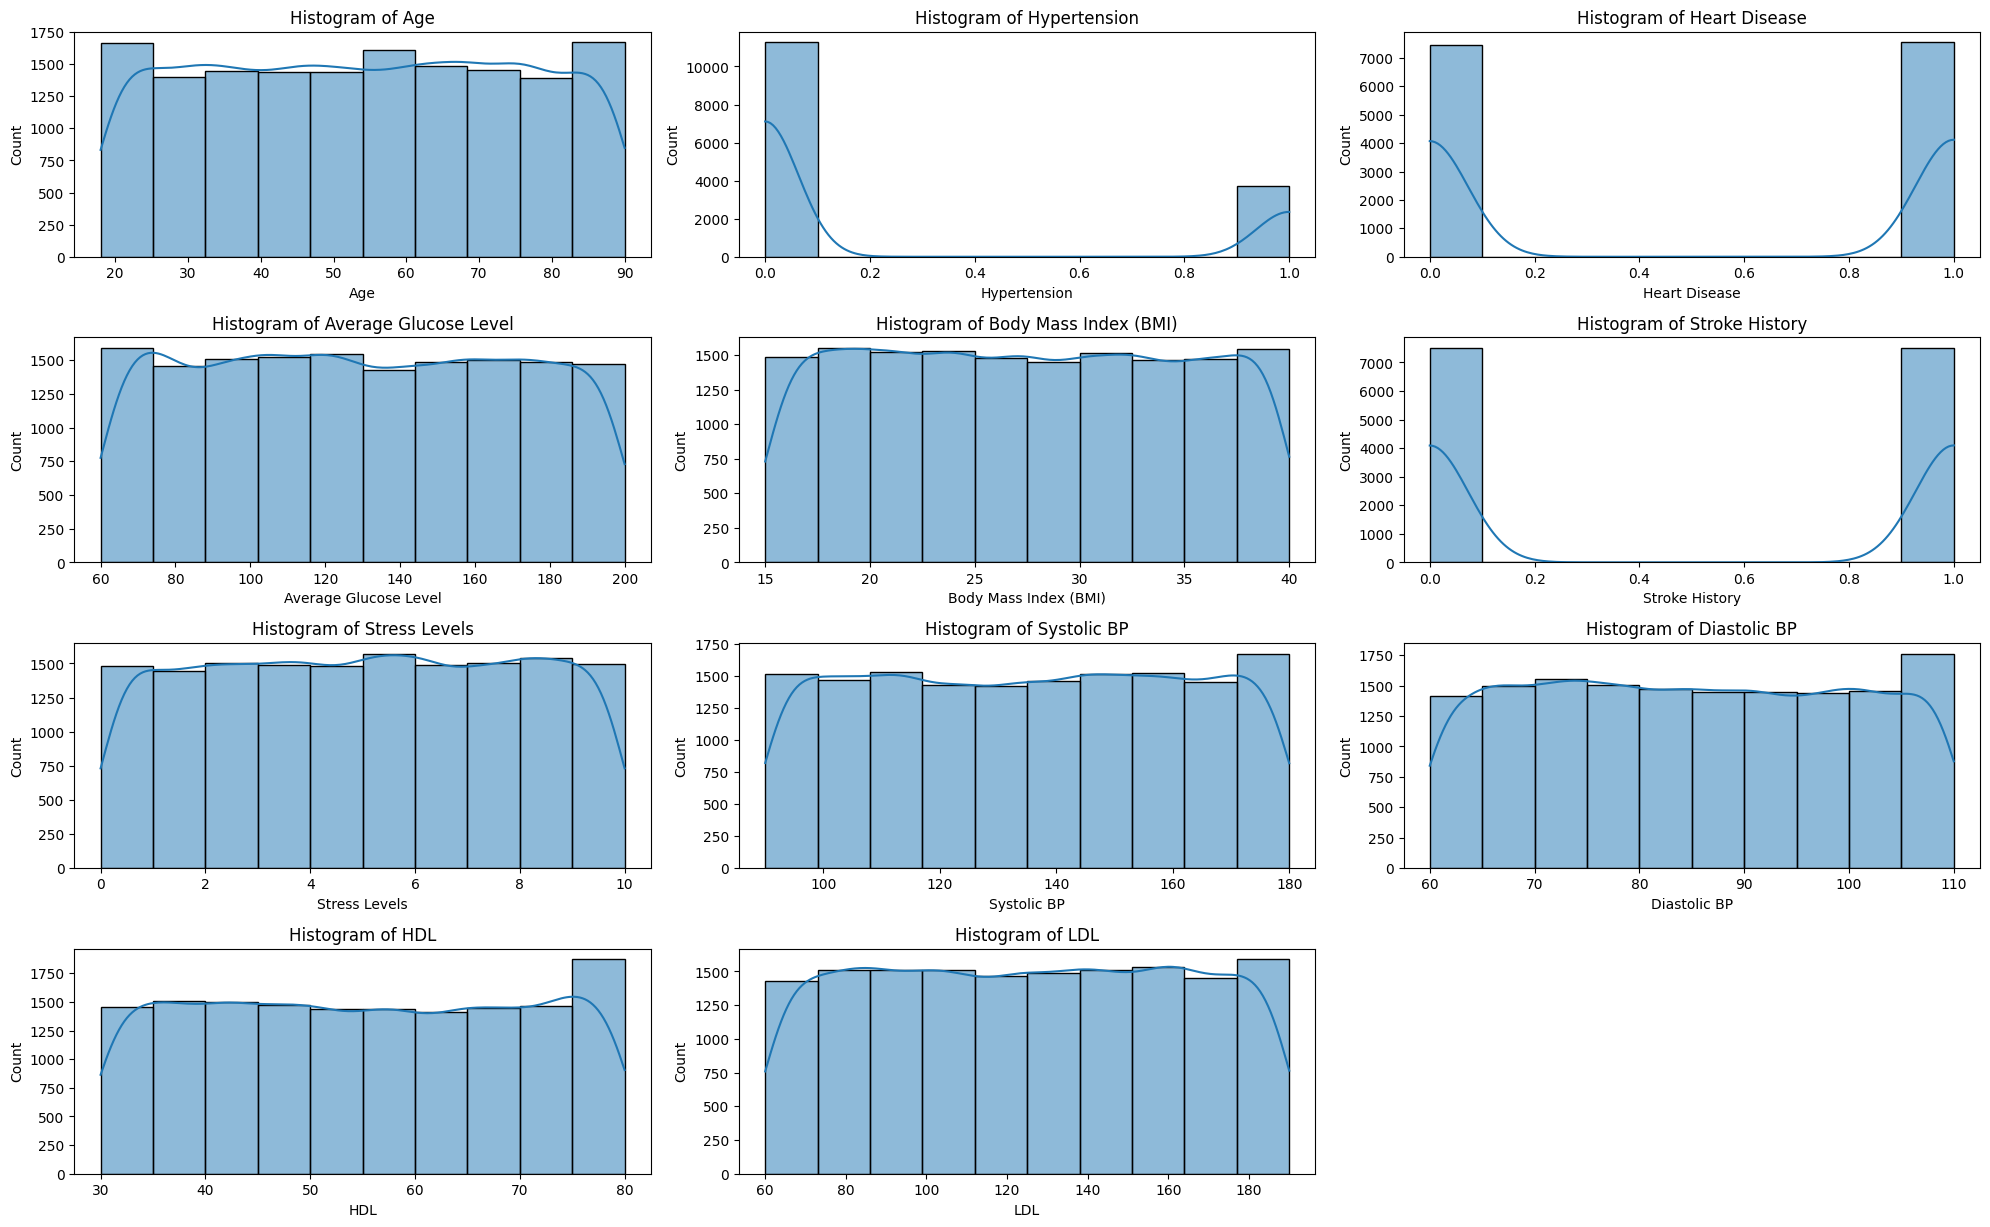

In [26]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 3, i + 1)
    sns.histplot(data=df, x=col, bins=10, kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

Observation:   
* Age: Fairly uniform distribution with a slight concentration in the 20-30 range.
*   Hypertension: Majority of individuals do not have Hypertension
*   Average Glucose Level: Mostly uniform, peaking slightly around 60-80.
*   BMI,Stress Levels: Wide range of values, no extreme peaks.
*   Heart Disease and Stroke History: Equally distributed
* Systolic BP: Uniform distribution with a slight increase at higher levels (up to 180).
* Diastolic BP: Uniform distribution with more patients at higher levels (up to 110).
* HDL: Mostly uniform, fewer patients at extreme ends (around 30 and 80).
* LDL: Fairly even distribution, slight decrease at high end (around 180).





In [27]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['Gender', 'Marital Status', 'Work Type', 'Residence Type',
       'Smoking Status', 'Alcohol Intake', 'Physical Activity',
       'Family History of Stroke', 'Dietary Habits', 'Symptoms', 'Diagnosis'],
      dtype='object')


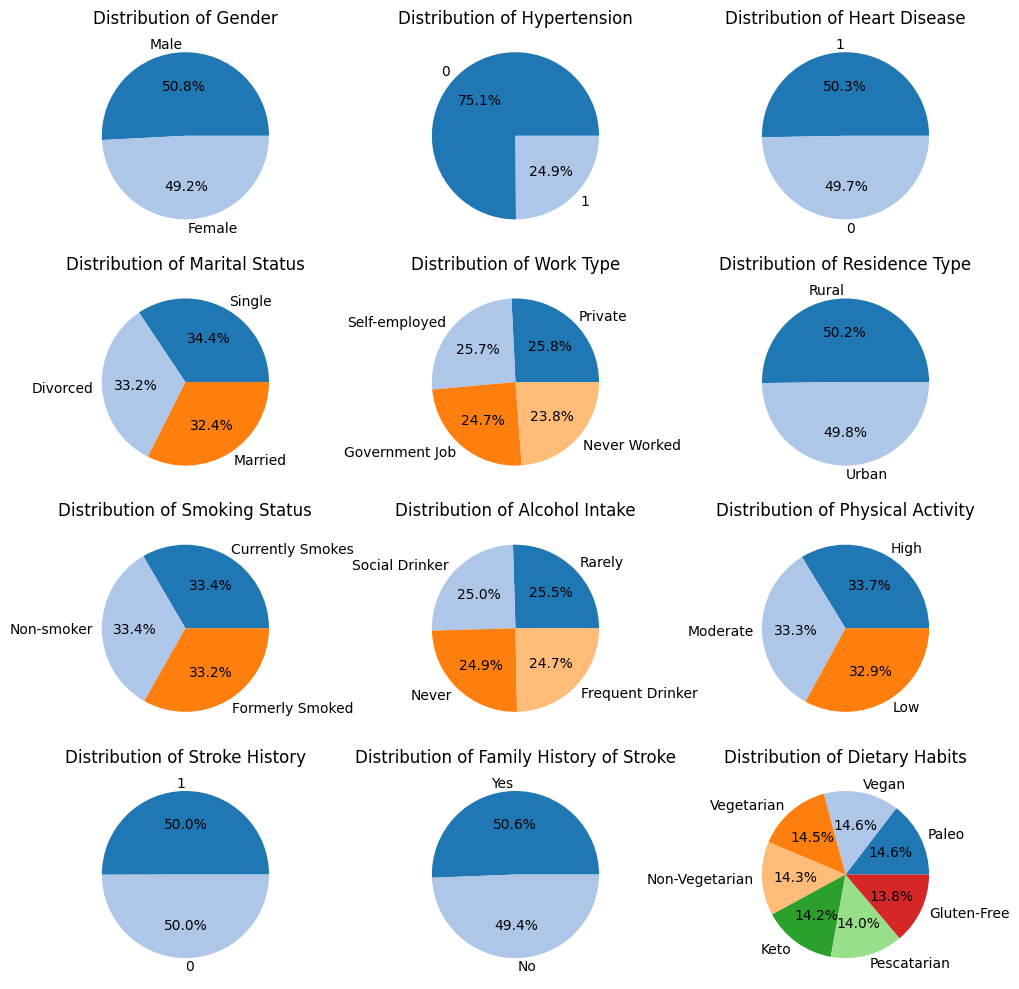

In [28]:
import matplotlib.pyplot as plt
categorical_cols = ['Gender', 'Hypertension', 'Heart Disease', 'Marital Status',
                    'Work Type', 'Residence Type', 'Smoking Status', 'Alcohol Intake',
                    'Physical Activity', 'Stroke History', 'Family History of Stroke',
                    'Dietary Habits']
n_rows = 4
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10,10))
axes = axes.flatten()
for i, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i], colors=plt.cm.tab20.colors)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
plt.tight_layout()
plt.show()



Observation:
*  Gender: Almost equal distribution between males and females.
*   Health Conditions: Majority don't have hypertension; heart disease is evenly split.
*   Socio-Demographics: Marital status, work type, and residence type are fairly balanced.
*   Lifestyle Factors: Smoking, alcohol intake, and physical activity show even distributions.
*   Stroke and Family History: Stroke history is evenly split (50% each), and family history of stroke is almost balanced (50.6% Yes, 49.4% No).
*   Dietary Habits: Evenly distributed



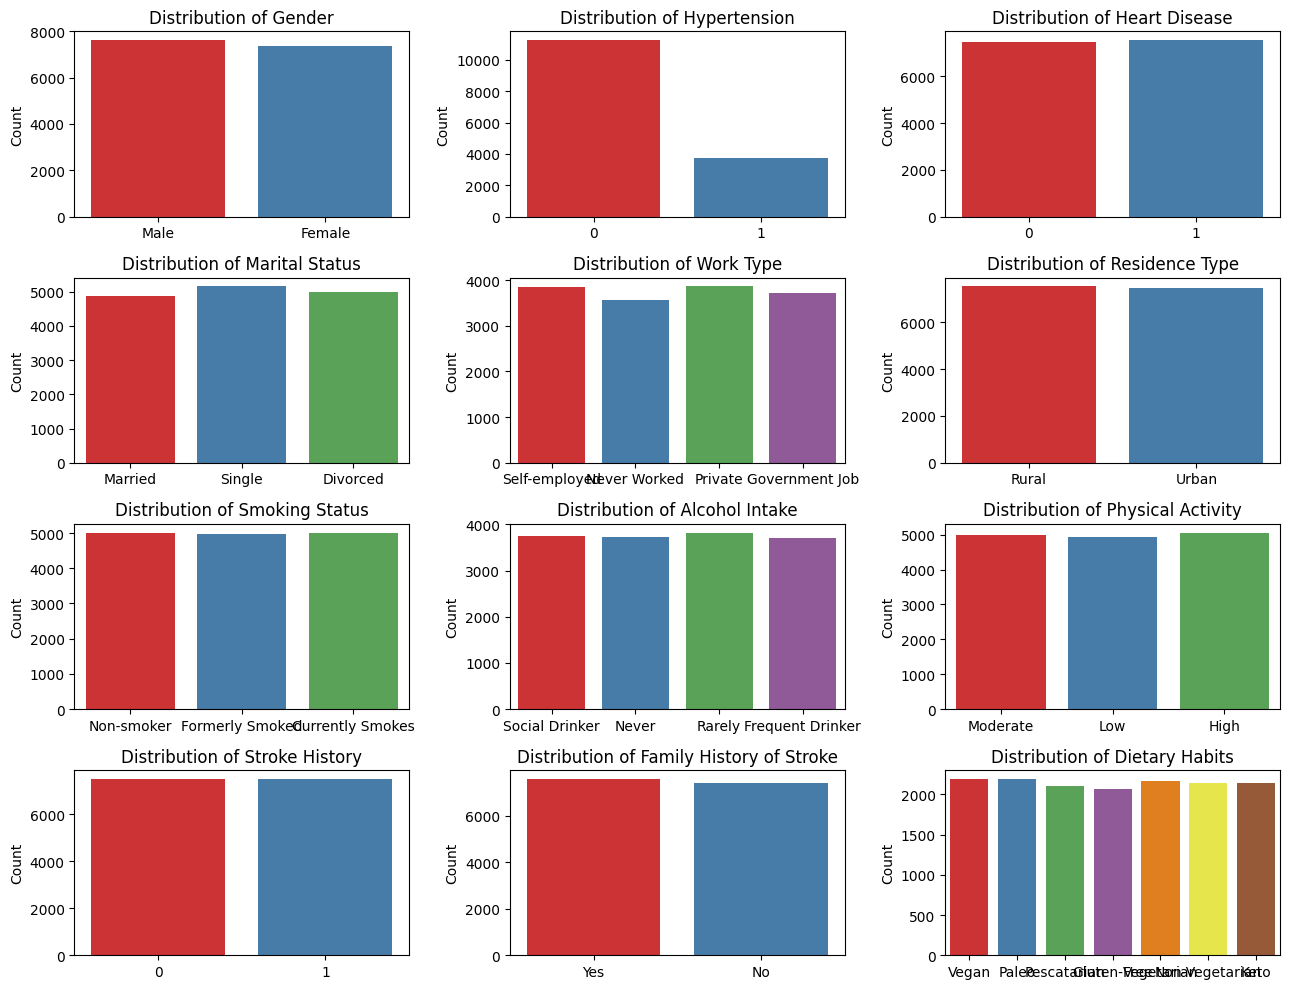

In [29]:
categorical_cols = ['Gender', 'Hypertension', 'Heart Disease', 'Marital Status',
                    'Work Type', 'Residence Type', 'Smoking Status', 'Alcohol Intake',
                    'Physical Activity', 'Stroke History', 'Family History of Stroke',
                    'Dietary Habits']
n_rows = 4
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(13, 10))
axes = axes.flatten()
# Countplot for each categorical column
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue=col, palette='Set1', dodge=False, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].legend().set_visible(False)

plt.tight_layout()
plt.show()


Observation:
* Demographics: Equal gender distribution.
* Health: More without hypertension; heart disease evenly split.
* Lifestyle: Smoking and alcohol intake evenly distributed.
* Status: Slightly more singles; balanced work types.
* Living: Equal rural/urban split; balanced physical activity.
* Stroke History, Family History : Nearly equal counts
* Dietary Habits: Equally distributed for all types

**Comparitive Analysis**

<Axes: xlabel='Gender', ylabel='count'>

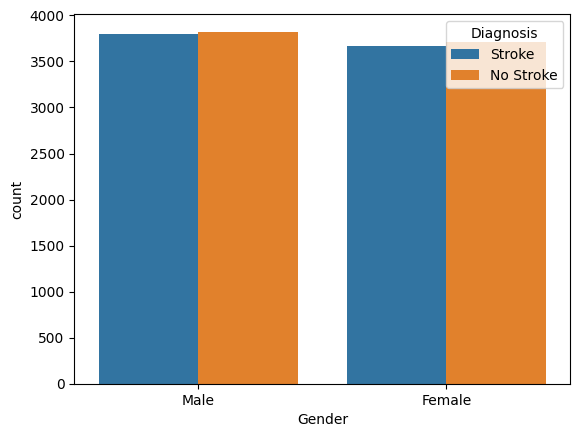

In [30]:
# Does gender affect stroke?
sns.countplot(data=df, x='Gender', hue='Diagnosis')

Obervation: Gender does not significantly impact stroke

<Axes: xlabel='Diagnosis', ylabel='Age'>

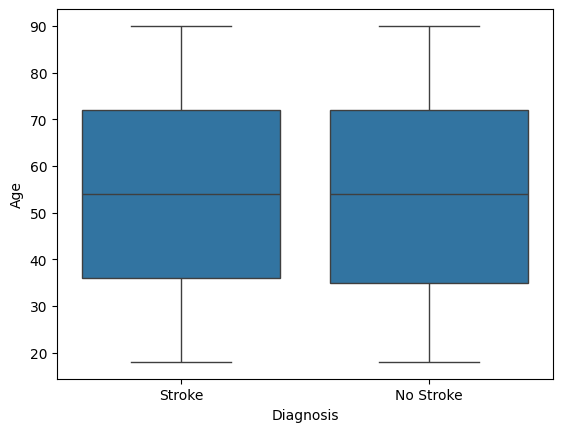

In [31]:
# Does age affect stroke?
sns.boxplot(data=df, x='Diagnosis', y='Age')

Observation: The age distribution for individuals with and without stroke is quite similar, suggesting that age alone may not strongly differentiate stroke risk in this dataset

<Axes: xlabel='Diagnosis', ylabel='count'>

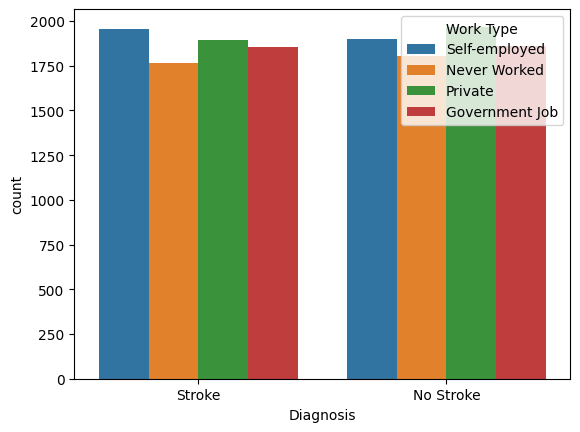

In [32]:
sns.countplot(df,x="Diagnosis",hue="Work Type")

Observation: Self-employed individuals tend to have a slightly higher stroke rate, while those in private jobs are less likely to experience strokes.

<Axes: xlabel='Diagnosis', ylabel='count'>

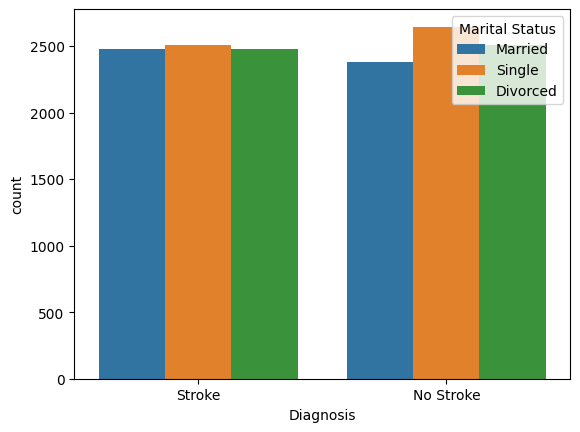

In [33]:
sns.countplot(df, x="Diagnosis", hue="Marital Status")

Observation: Marital status does not have a substantial impact on the incidence of stroke in this dataset.

<Axes: xlabel='Diagnosis', ylabel='count'>

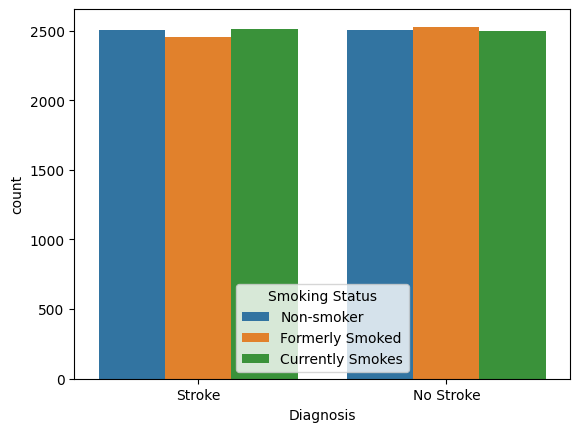

In [34]:
sns.countplot(df,x="Diagnosis",hue="Smoking Status")

Observation:
The counts of smoking statuses are similar for both stroke and no stroke groups, indicating no significant difference based on smoking status.

<Axes: xlabel='Diagnosis', ylabel='count'>

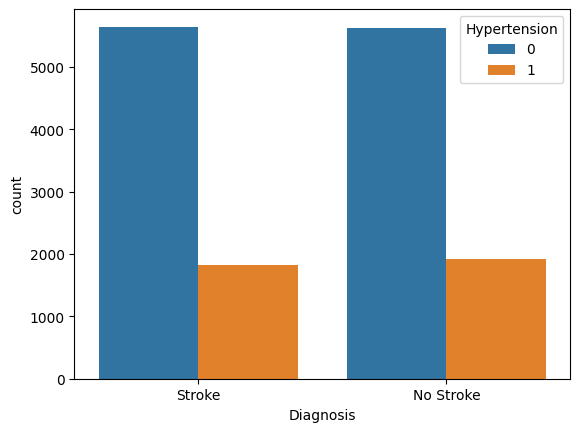

In [35]:
sns.countplot(df,x="Diagnosis",hue="Hypertension")

Observation: The count of individuals with and without hypertension is similar in both the stroke and no stroke groups.

<Axes: xlabel='Diagnosis', ylabel='count'>

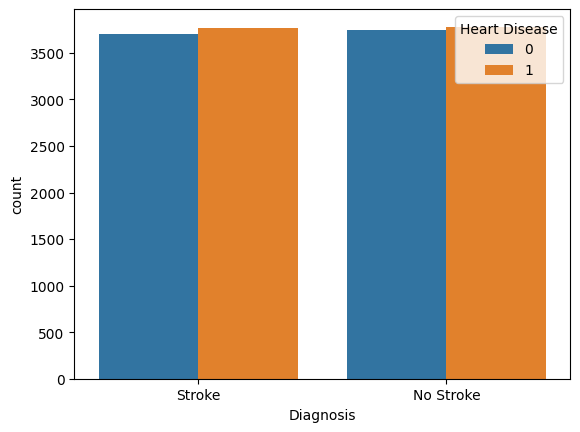

In [36]:
sns.countplot(df,x="Diagnosis",hue="Heart Disease")

Observation: The counts of individuals with and without heart disease are similar for both stroke and no stroke groups.

<Axes: xlabel='Diagnosis', ylabel='count'>

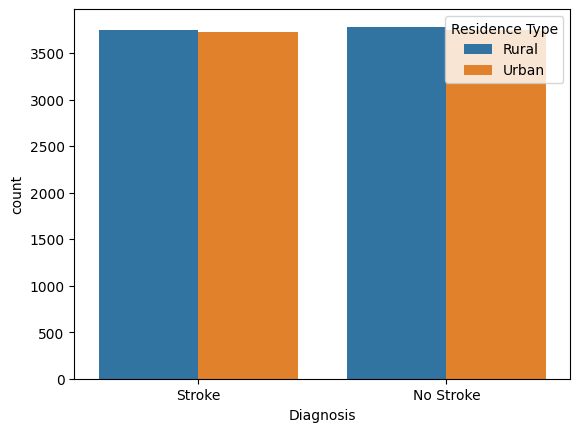

In [37]:
sns.countplot(df,x="Diagnosis",hue="Residence Type")

Observation: The number of individuals diagnosed with "Stroke" and "No Stroke" is quite balanced between the two residence types

<Axes: xlabel='Diagnosis', ylabel='count'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


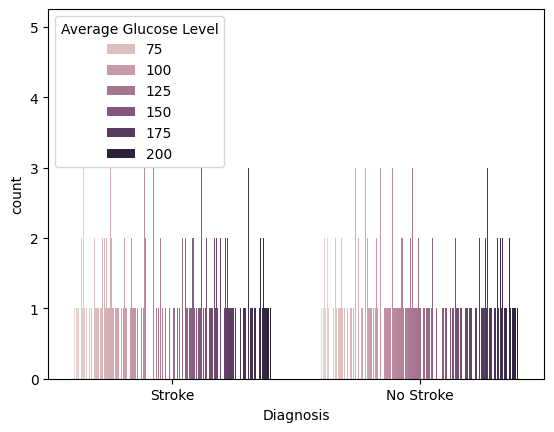

In [38]:
sns.countplot(df,x="Diagnosis",hue="Average Glucose Level")

Observation: The distribution of individuals across a range of glucose levels (75 to 200) is similar for both diagnoses, indicating no significant difference in average glucose levels between the two groups.

<Axes: xlabel='Diagnosis', ylabel='count'>

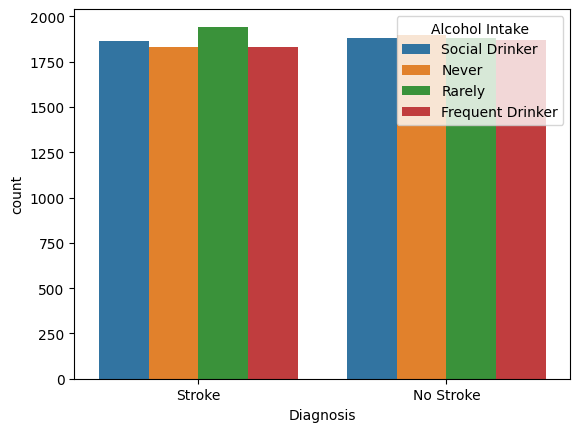

In [39]:
sns.countplot(df,x="Diagnosis",hue="Alcohol Intake")

Observation: Alcohol intake habits show no significant difference between stroke and non-stroke groups. However, individuals who consume alcohol rarely have a slightly higher chance of stroke compared to other categories.

<Axes: xlabel='Diagnosis', ylabel='count'>

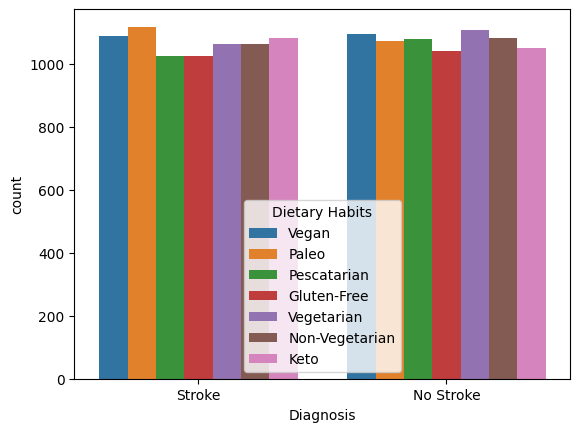

In [40]:
sns.countplot(df,x="Diagnosis",hue="Dietary Habits")

Observation: Paleo food intake has higher chances of stroke compared to other dietary habits.

####Feature Extraction

In [41]:
df['Cardiovascular_Risk_Score'] = df['Systolic BP'] + df['Diastolic BP'] + df['LDL'] - df['HDL']
df['Cardiovascular_Risk_Score']

0        313
1        244
2        287
3        322
4        219
        ... 
14995    372
14996    374
14997    333
14998    243
14999    315
Name: Cardiovascular_Risk_Score, Length: 15000, dtype: int64

In [42]:
df.drop(['Systolic BP', 'Diastolic BP', 'LDL', 'HDL'], axis=1, inplace=True)

In [43]:
df['BMI_Category'] = pd.cut(df['Body Mass Index (BMI)'], bins=[0, 18.5, 25, 30, np.inf], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

In [44]:
df['BMI_Category'].value_counts()

BMI_Category
Obese          5989
Normal         3992
Overweight     2923
Underweight    2096
Name: count, dtype: int64

In [45]:
df['BMI_Category']

0            Normal
1             Obese
2            Normal
3        Overweight
4        Overweight
            ...    
14995         Obese
14996        Normal
14997    Overweight
14998    Overweight
14999         Obese
Name: BMI_Category, Length: 15000, dtype: category
Categories (4, object): ['Underweight' < 'Normal' < 'Overweight' < 'Obese']

####Feature Construction

Encoding Categorical variables- Label Encoder

In [46]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
cols = ['Gender', 'Marital Status', 'Work Type', 'Residence Type', 'Smoking Status', 'Alcohol Intake', 'Physical Activity', 'Family History of Stroke', 'Dietary Habits', 'Diagnosis', 'Symptoms','BMI_Category']

for col in cols:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    label_encoders[col] = label_encoder
for col in label_encoders:
    if col != 'Symptoms':
        le = label_encoders[col]
        mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print(f'{col}: {mapping}')


Gender: {'Female': 0, 'Male': 1}
Marital Status: {'Divorced': 0, 'Married': 1, 'Single': 2}
Work Type: {'Government Job': 0, 'Never Worked': 1, 'Private': 2, 'Self-employed': 3}
Residence Type: {'Rural': 0, 'Urban': 1}
Smoking Status: {'Currently Smokes': 0, 'Formerly Smoked': 1, 'Non-smoker': 2}
Alcohol Intake: {'Frequent Drinker': 0, 'Never': 1, 'Rarely': 2, 'Social Drinker': 3}
Physical Activity: {'High': 0, 'Low': 1, 'Moderate': 2}
Family History of Stroke: {'No': 0, 'Yes': 1}
Dietary Habits: {'Gluten-Free': 0, 'Keto': 1, 'Non-Vegetarian': 2, 'Paleo': 3, 'Pescatarian': 4, 'Vegan': 5, 'Vegetarian': 6}
Diagnosis: {'No Stroke': 0, 'Stroke': 1}
BMI_Category: {'Normal': 0, 'Obese': 1, 'Overweight': 2, 'Underweight': 3}


In [47]:
df.head(10)

,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Symptoms,Diagnosis,Cardiovascular_Risk_Score,BMI_Category
0,56,1,0,1,1,3,0,130.91,22.37,2,3,2,0,1,5,3.48,1375,1,313,0
1,80,1,0,0,2,3,1,183.73,32.57,2,1,1,0,0,3,1.73,3146,1,244,1
2,26,1,1,1,1,1,0,189.00,20.32,1,2,0,0,1,3,7.31,4201,1,287,0
3,73,1,0,0,1,1,1,185.29,27.50,2,0,2,0,0,3,5.35,4059,0,322,2
4,51,1,1,1,0,3,1,177.34,29.06,0,2,1,0,1,4,6.84,1150,1,219,2
5,62,0,0,0,2,2,1,91.60,37.47,0,3,0,0,0,0,4.85,4637,1,185,1
6,40,0,1,0,1,2,1,77.83,28.20,0,1,1,1,0,6,6.38,1150,0,386,2
7,61,0,0,1,0,0,0,194.73,26.44,1,2,2,1,0,5,5.85,2911,1,319,2
8,72,0,1,1,1,3,0,72.99,30.10,1,2,0,1,0,6,0.73,3075,1,316,1
9,82,1,0,0,0,3,1,111.23,28.83,0,2,0,1,1,2,8.39,1150,0,263,2


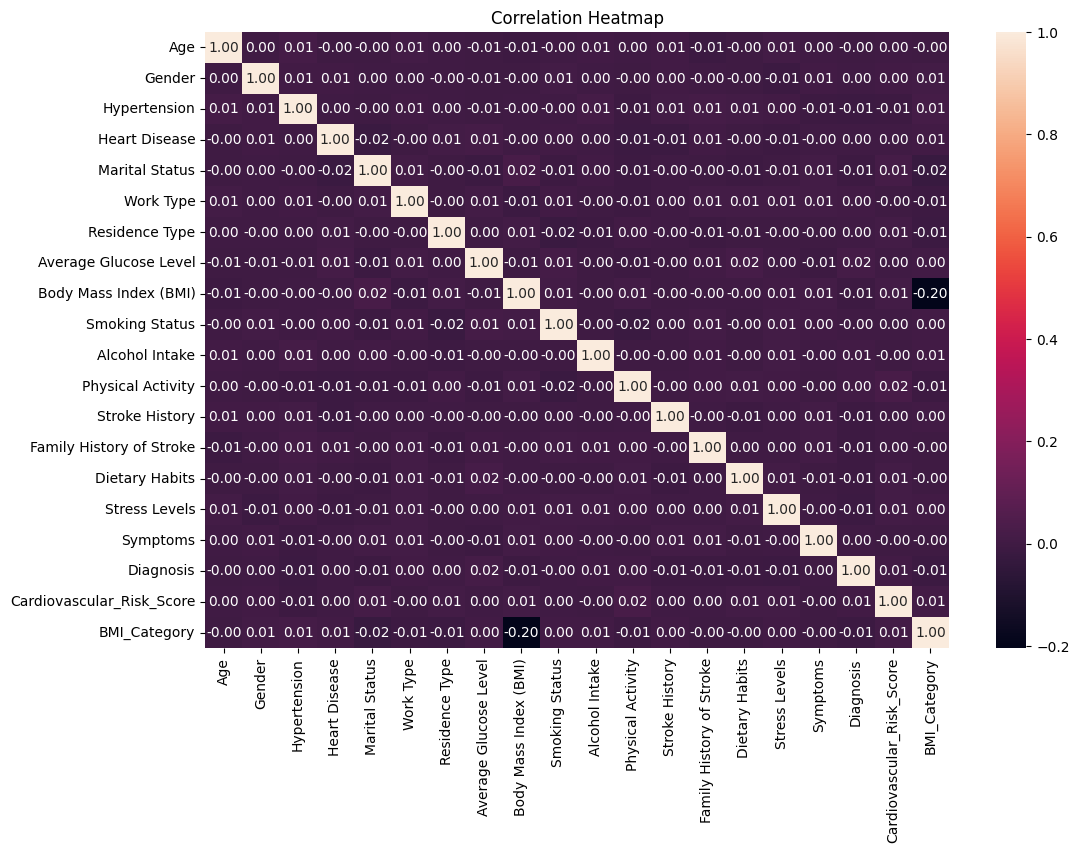

In [48]:
# Heatmap for correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [49]:
df.shape

(15000, 20)

In [50]:
df.columns

Index(['Age', 'Gender', 'Hypertension', 'Heart Disease', 'Marital Status',
       'Work Type', 'Residence Type', 'Average Glucose Level',
       'Body Mass Index (BMI)', 'Smoking Status', 'Alcohol Intake',
       'Physical Activity', 'Stroke History', 'Family History of Stroke',
       'Dietary Habits', 'Stress Levels', 'Symptoms', 'Diagnosis',
       'Cardiovascular_Risk_Score', 'BMI_Category'],
      dtype='object')

###**Logistic Regression for all columns**

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Diagnosis'])
Y = df['Diagnosis']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LogisticRegression(random_state=42)

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')


print(classification_report(Y_test, Y_pred))

print('Confusion Matrix:')
print(confusion_matrix(Y_test, Y_pred))


Accuracy: 0.50
              precision    recall  f1-score   support

           0       0.50      0.58      0.54      1481
           1       0.51      0.42      0.46      1519

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.50      0.50      0.50      3000

Confusion Matrix:
[[863 618]
 [880 639]]


#**Feature Selection**

###Fillter Approach-Information Gain

In [51]:
import pandas as pd
import numpy as np

def entropy(y):
    # Calculate entropy of a target variable y.
    unique, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def conditional_entropy(y, x):
    # Calculate conditional entropy of target variable y given feature x.
    unique_values, value_counts = np.unique(x, return_counts=True)
    probabilities = value_counts / len(x)
    conditional_entropy = 0
    for value, prob in zip(unique_values, probabilities):
        conditional_entropy += prob * entropy(y[x == value])
    return conditional_entropy

def information_gain(y, x):
    return entropy(y) - conditional_entropy(y, x)


Y = df['Diagnosis']
X = df.drop(columns=['Diagnosis'])

# Calculate information gain for each feature
info_gains = {}
for feature in X.columns:
    info_gain_val = information_gain(Y, X[feature])
    info_gains[feature] = info_gain_val

# Sort information gains in descending order
sorted_info_gains = sorted(info_gains.items(), key=lambda x: x[1], reverse=True)

# Print information gains in descending order
print("Information Gains (Descending Order):")
for feature, ig in sorted_info_gains:
    print(f"{feature}: {ig:.4f}")


Information Gains (Descending Order):
Average Glucose Level: 0.6066
Symptoms: 0.3829
Body Mass Index (BMI): 0.1435
Stress Levels: 0.0508
Cardiovascular_Risk_Score: 0.0159
Age: 0.0047
BMI_Category: 0.0003
Marital Status: 0.0003
Dietary Habits: 0.0002
Alcohol Intake: 0.0001
Work Type: 0.0001
Hypertension: 0.0001
Family History of Stroke: 0.0001
Stroke History: 0.0000
Smoking Status: 0.0000
Physical Activity: 0.0000
Heart Disease: 0.0000
Gender: 0.0000
Residence Type: 0.0000


In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

top_features = [feature for feature, ig in sorted_info_gains if ig > 0.1]
print("Top Features:", top_features)


X_selected = X[top_features]

X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Top Features: ['Average Glucose Level', 'Symptoms', 'Body Mass Index (BMI)']
Accuracy: 0.5143
Confusion Matrix:
[[958 523]
 [934 585]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.65      0.57      1481
           1       0.53      0.39      0.45      1519

    accuracy                           0.51      3000
   macro avg       0.52      0.52      0.51      3000
weighted avg       0.52      0.51      0.51      3000



###Fillter Approach-Mutual Information

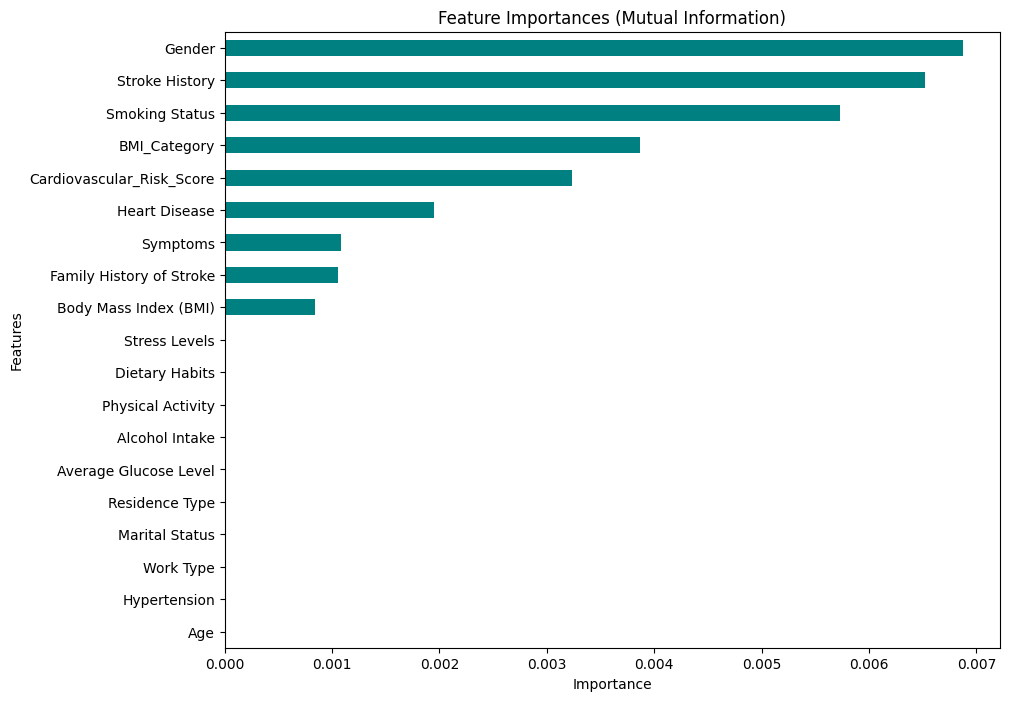

In [53]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt


X = df.drop(columns=['Diagnosis'])
Y = df['Diagnosis']

# Calculate mutual information (information gain)
importances = mutual_info_classif(X, Y)

# Create a Series for feature importances
feat_importances = pd.Series(importances, index=X.columns)


plt.figure(figsize=(10, 8))
feat_importances.sort_values().plot(kind='barh', color='teal')
plt.title('Feature Importances (Mutual Information)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [54]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


top_N_features = feat_importances.sort_values(ascending=False).head(9).index
print("Top Features:", top_N_features)


X_selected = X[top_N_features]

X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Top Features: Index(['Gender', 'Stroke History', 'Smoking Status', 'BMI_Category',
       'Cardiovascular_Risk_Score', 'Heart Disease', 'Symptoms',
       'Family History of Stroke', 'Body Mass Index (BMI)'],
      dtype='object')
Accuracy: 0.5003
Confusion Matrix:
[[1012  469]
 [1030  489]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.68      0.57      1481
           1       0.51      0.32      0.39      1519

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.48      3000
weighted avg       0.50      0.50      0.48      3000



###Fillter Approach-Fisher Score(ANOVA Test)

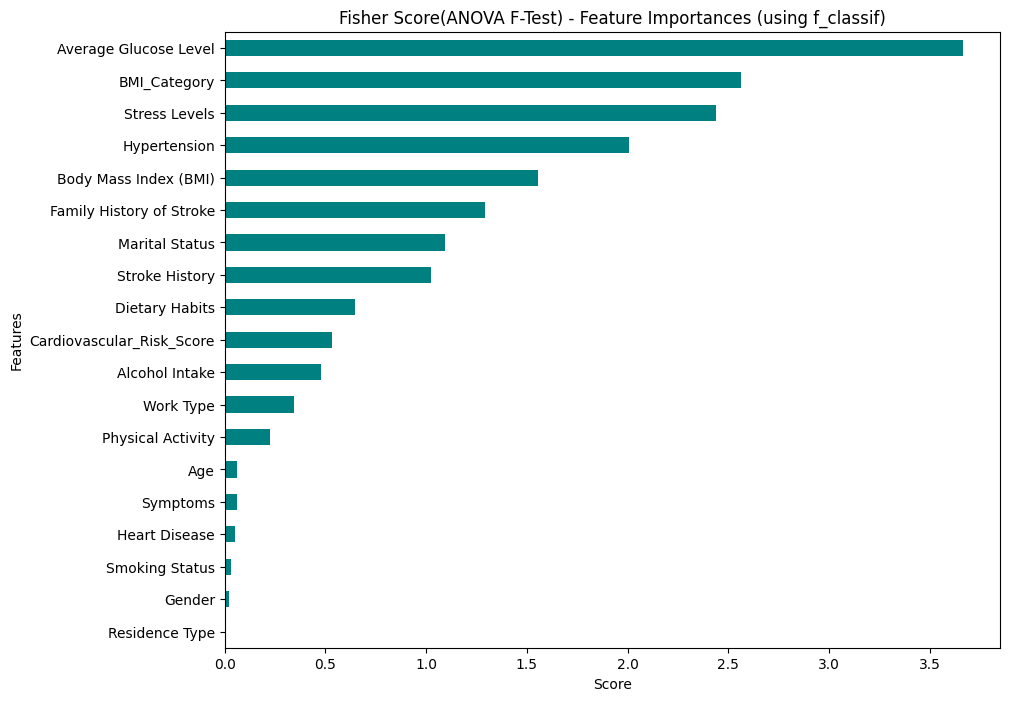

In [55]:
from sklearn.feature_selection import SelectKBest, f_classif


Y = df['Diagnosis']
X = df.drop(columns=['Diagnosis'])

selector = SelectKBest(score_func=f_classif, k='all')

X_scores = selector.fit_transform(X, Y)

scores = selector.scores_
feat_importances = pd.Series(scores, index=X.columns)

# Plotting the ranks
plt.figure(figsize=(10, 8))
feat_importances.sort_values().plot(kind='barh', color='teal')
plt.title('Fisher Score(ANOVA F-Test) - Feature Importances (using f_classif)')
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()


In [56]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


top_N_features = feat_importances.sort_values(ascending=False).head(9).index
print("Top Features:", top_N_features)
X_selected = X[top_N_features]


X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Top Features: Index(['Average Glucose Level', 'BMI_Category', 'Stress Levels',
       'Hypertension', 'Body Mass Index (BMI)', 'Family History of Stroke',
       'Marital Status', 'Stroke History', 'Dietary Habits'],
      dtype='object')
Accuracy: 0.4980
Confusion Matrix:
[[865 616]
 [890 629]]
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.58      0.53      1481
           1       0.51      0.41      0.46      1519

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.49      3000
weighted avg       0.50      0.50      0.49      3000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###Fillter Approach- Chi-Square

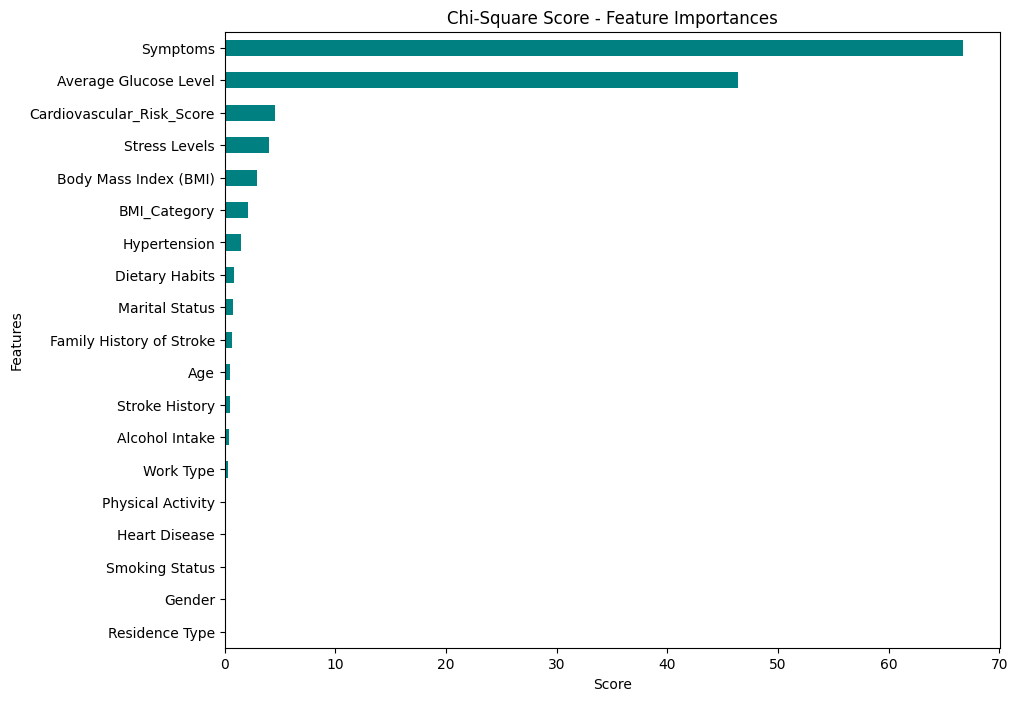

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2

# Assuming df is your DataFrame
Y = df['Diagnosis']
X = df.drop(columns=['Diagnosis'])

selector = SelectKBest(score_func=chi2, k='all')

X_scores = selector.fit_transform(X, Y)

scores = selector.scores_
feat_importances = pd.Series(scores, index=X.columns)

plt.figure(figsize=(10, 8))
feat_importances.sort_values().plot(kind='barh', color='teal')
plt.title('Chi-Square Score - Feature Importances')
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Select the top features based on the plot
selected_features = feat_importances.nlargest(9).index.tolist()
print("Top Features:", selected_features)
X_selected = X[selected_features]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)


Top Features: ['Symptoms', 'Average Glucose Level', 'Cardiovascular_Risk_Score', 'Stress Levels', 'Body Mass Index (BMI)', 'BMI_Category', 'Hypertension', 'Dietary Habits', 'Marital Status']
Accuracy: 0.51
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.60      0.55      1481
           1       0.52      0.42      0.46      1519

    accuracy                           0.51      3000
   macro avg       0.51      0.51      0.51      3000
weighted avg       0.51      0.51      0.51      3000

Confusion Matrix:
[[894 587]
 [883 636]]
